In [1]:
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# 1. Критерии Согласия хи-квадрат и Колмогорова.

Стоит напомнить, что в общем случае функция распределения $F_{\xi}$ случайной величины $\xi$ дает исчерпывущую харрактеристику о данной случайной величине.

В реальности часто возникают ситуации, в которых ДО проверки гипотезы о параметрах распределения необходимо определиться с ВИДОМ функции распределения $F_{0}(x, \theta)$ генеральной совокупности.
Например, это может быть нормальное распределение $F_{0}(x, \theta) = N(\mu, \sigma^{2})$ или распределение Стьюдента $F_{0}(x, \theta) = t(n)$, или любое другое.

После того, как будет подтверждена гипотеза о виде функции распределния $F_{0}(x, \theta)$, можно приступать к проверке гипотезы о соответствующих параметрах распределения.

Критерии, в которых проверяется ВИД функции распределения $F_{\xi}(x, \theta)$ генеральной совокупности $\xi$ еще называют критериями СОГЛАСИЯ, поскольку на их основе возможно определить согласуются ли результаты наблюдений с теоритическими, т.е. отвечающих ожидаемому виду функции распределения $F_{0}(x, \theta)$.

## 1.1 Критерий согласия хи-квадрат для простой гипотезы.

Идея критерия согласия хи-квадрат довольно простая.
Рассморим выборку $X_{n} = \{x_{1}, x_{2}, \cdots, x_{n}\}$ из генеральной совокупности $\xi$ и примем статистическое решение при:
- ПРОСТОЙ гипотезе $H_{0}: F_{\xi}(x) = F_{0}(x)$ против
- ПРОСТОЙ альтернативы: $H_{1}: F_{\xi}(x) = F_{1}(x)$.

Для этого разобьем множество реализаций $X_{n}$ случайной величины $\xi$ на конечное число интервалов $\Delta_{i}$, $i=\overline{1,r}$.
Стоит отметить, что обязательным условием разбиения является покрытие итеравлами ВСЕЙ области возможных значений случайной величины $\xi$, т.е. вероятность реализации случайной величины на ЛЮБОМ интервале ненулевая.

После проведения процедуры разбиения можнос составить следующие величины:
1. Теоритические вероятности принадлежности интервалу $\Delta_{i}$: $p_{i} = P(\xi \subset \Delta_{i} ) = F_{0}(\Delta_{i}^{right} - \Delta_{i}^{left})$, $i = \overline{1,r}$, где $\Delta_{i}^{right}$ и $\Delta_{i}^{left}$ соответственно правая и левая границы интервала $\Delta_{i}$, а $F_{0}(x)$ - теоритическая функция распределения. То есть, при гипотезе о стандартном нормальном распределении $F_{0}(x) \sim N(0, 1)$, при гипотезе об экспоненциальном законе распрделения $F_{0}(x) \sim exp(\lambda)$, и.т.д.
2. Количество реализаций случайной величины $\xi$ на интервале $\Delta_{i}$: $n_{i} = num\{x_{i} \subset \Delta_{i}\}$, $i = \overline{1, r}$.

В качестве СТАТИСТИКИ КРИТЕРИЯ выбререм следующую статистику, харрактеризующую среднеквадратичные отклонения частотной харрактеристики вероятности от ее теоритического значения:
\begin{equation*}
    Z(\cdot) = \sum_{i=1}^{r}\frac{n}{p_{i}} (\frac{n_{i}}{n} - p_{i})^{2} = \sum_{i=1}^{r}\frac{(n_{i} - np_{i})^{2}}{np_{i}},
\end{equation*}

**Теорема К.Пирсона**: При верной гипотезе $H_{0}$, статистика $Z(\cdot)$ (см. выше) сходится по распределению к хи-квадрат распределению $\chi^{2}(r-1)$, т.е.:
\begin{equation*}
    Z(\cdot) = \sum_{i=1}^{r}\frac{(n_{i} - np_{i})^{2}}{np_{i}} \underset{n \rightarrow +\infty}{ \overset{d} {\longrightarrow}} \sim \chi^{2}(r-1).
\end{equation*}

Таким образом, зная закон распределения статистики критерия мы можем построить критическую область $V_{k}$ по заданному уровню значимости $\alpha$ (используется ПРАВОСТОРОННИЙ критерий) : $V_{k} = (\chi^{2}_{1-\alpha}(r-1), +\infty)$, где $\chi^{2}_{1-\alpha}(r-1)$ - это квантиль распределения хи-квадрат порядка $(1 - \alpha)$.
Определив выборочное значение статистики $z$ мы можем проверить его принадлежность критическиой области $V_{k}$ и принять статистическое решение.

**P.S.** Разбивать на интервалы следует так, чтобы $np_{i} \geq 5 $, $i = \overline{1,r}$. 
Если же это неравенство НЕ выполнено, то необходимо ОБЪЕДИНЯТЬ соседние интервалы до тех пор пока условие не станет справедливо для всех интервалов.

**Пример задачи**: (пример решения аналогичной задачи можно посмотреть [тут](https://stepik.org/lesson/26280/step/6?unit=8173))

Исследователь Василий по выборке:

\begin{equation*}
    X_{n} = \{0.29, 0.01, 0.50, 0.21, 0.65, 0.34, 0.75, 0.07, 0.07, 0.25, 1.26, 0.11, 0.22, 0.95, 0.63, 0.93, 0.73, 0.37, 0.80, 1.10\}
\end{equation*}

проверяет гипотезу об экспоненциальном законе распределения с параметром $\lambda = 2$ генеральной совокупности $\xi$.
Для проверки гипотезы с помощью критерия хи-квадрат Василию необходимо:
- Выбрать разбиение на интервалы.
- Найти выборочное значение статистики критерия 
- Принять статистическое решение при уровене значимости $\alpha = 0.01$.

In [94]:
data = np.array([0.29, 0.01, 0.50, 0.21, 0.65, 0.34, 0.75, 0.07, 0.07, \
                 0.25, 1.26, 0.11, 0.22, 0.95, 0.63, 0.93, 0.73, 0.37, 0.80, 1.10])
intervals = [ [0., 0.2], [0.2, 0.5],[0.5, np.max(data) + 1.]]
n = data.shape[0]
lamb = 2.
alpha = 0.01
group_numb = 3

ni = np.array([np.sum(data <= 0.2), np.sum( np.logical_and(data > 0.2, data <= 0.5)), np.sum(data > 0.5)])
pi = np.array([st.expon.cdf(i[1], scale = 1./lamb) - st.expon.cdf(i[0], scale= 1./lamb) for i in intervals])
pi[2] = 1. - (pi[0]+pi[1])
# Выборочное значение статистики
z_v = np.sum( (ni - n*pi)**2 / (n*pi))
# Критическое значение статистики
z_cr = st.chi2.ppf(1. - alpha, group_numb - 1.)
if (z_v < z_cr): print('{:.3f}, H0'.format(z_v))
else : print('{:.3f}, H1'.format(z_v))

1.536, H0


## 1.2 Критерий Колмогорова для простой гипотезы.

Идея критерия Колмогорова так-же довольна проста и основана на сравнении ТЕОРИТИЧЕСКОЙ $F_{0}(x)$ и ЭМПИРИЧЕСКОЙ $F^{*}(x)$ функциях распределения.
Рассморим выборку $X_{n} = \{x_{1}, x_{2}, \cdots, x_{n}\}$ из генеральной совокупности $\xi$ и примем статистическое решение при:
- ПРОСТОЙ гипотезе $H_{0}: F_{\xi}(x) = F_{0}(x)$ против
- ПРОСТОЙ альтернативы: $H_{1}: F_{\xi}(x) = F_{1}(x)$.

Оценку близости распределения выборки найдем оценив точную верхнюю грань модулей разности между теоритической $F_{0}(x)$ и эмпирической $F^{*}(x)$ функциями распределения.

Очевидно, что модуль разности между функциями распределения мы можем вычислять только в точках в которых произошла реализация случайной величины (зеленые и голубые отрезки по длине равны модулям разности, см. рис. ниже).
После того как были найдены все модули разности, точная верхняя грань ищется как отрезок максмальной длины.

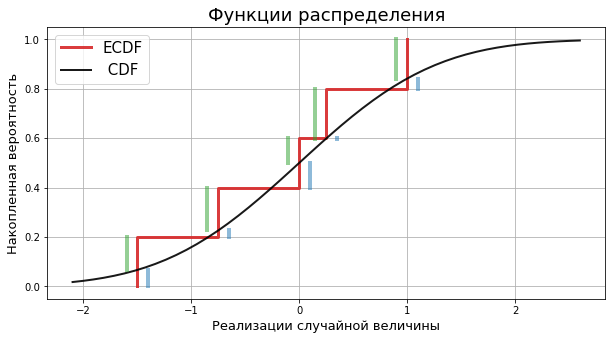

In [92]:
from matplotlib import rcParams
plt.rcParams['legend.fontsize'] = 15

norm_data = np.array([-1.5, -0.75, 0., 0.25, 1.])
ecdf = ECDF(norm_data)

fig, ax  = plt.subplots(figsize=(10, 5))
ecdf_x = np.sort(list(ecdf.x) + list(ecdf.x))[1:]
ecdf_y = np.sort(list(ecdf.y) + list(ecdf.y))[:-1]
tmp = np.linspace(np.min(x[1:]) - 0.5, np.max(x) + 1.5, 50)

ax.plot(ecdf_x, ecdf_y, color = 'C3', lw = 3, alpha = 0.9, label = 'ECDF')
ax.plot(tmp, st.norm.cdf(tmp), color = 'k', lw = 2, alpha = 0.9, label = ' CDF')

for i in xrange(1, ecdf.x.shape[0]):
    ax.plot([ecdf.x[i] - 0.1, ecdf.x[i] - 0.1], [ ecdf.y[i], st.norm.cdf(ecdf.x[i])], color = 'C2', lw = 4, alpha = 0.5)
    ax.plot([ecdf.x[i] + 0.1, ecdf.x[i] + 0.1], [st.norm.cdf(ecdf.x[i]),  ecdf.y[i-1]], color = 'C0', lw = 4, alpha = 0.5)

ax.grid('on')
ax.set_xlabel(u'Реализации случайной величины', fontsize= 13)
ax.set_ylabel(u'Накопленная вероятность', fontsize = 13)
ax.set_title(u'Функции распределения', fontsize = 18)
handles, labels = ax.get_legend_handles_labels() 
ax.legend(handles, labels)

plt.show()

В качестве СТАТИСТИКИ КРИТЕРИЯ выбререм функцию определющую точную верхнюю грань модуля разности эмпирической $F^{*}(x)$ и теоритической функций $F_{0}(x)$ распределения, как и описано ранее:
\begin{equation*}
    Z(\cdot) = \sqrt{n} \cdot \underset{x \subset R}{sup} \left| F^{*}(x) - F_{0}(x) \right|
\end{equation*}

**Теорема А.Н.Колмогорова**: Если гипотеза $H_{0}$ верна, и $F_{0}(x)$ непрерываная функция на $R$, то тогда имеет место сходимость:

\begin{equation*}
    P\big{\{} \sqrt{n} \cdot \underset{x \subset R}{sup} \left| F^{*}(x) - F_{0}(x) \right| \leq z \big{\}} \underset{n \rightarrow +\infty}{ \longrightarrow } K(z) = 1 + 2 \sum_{m=1}^{+\infty} (-1)^{m} e^{-2m^{2}z^{2}}
\end{equation*}

Таким образом, статитсика критерия имеет [распределение Колмогорова](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9A%D0%BE%D0%BB%D0%BC%D0%BE%D0%B3%D0%BE%D1%80%D0%BE%D0%B2%D0%B0), а зная закон распределения статистики критерия легко определяется критическая область $V_{k}$ при заданном уровне значимости (ПРАВОСТОРОННИЙ критерий) $\alpha$: $V_{k} = (d_{1-\alpha}, + \infty)$, где $d_{1-\alpha}$ - квантиль порядка $(1 - \alpha)$ распределения Колмогрова. 
Определив выборочное значение статистики $z$ мы можем проверить его принадлежность критическиой области $V_{k}$ и принять статистическое решение.

**P.S.** 
1. Выбор правостороннего критерия обусловлен тем фактом, что при справедливости гипотезы $H_{0}$ выборочное значение статистики критерия должно быть близко к 0 (эмпирическая и теоритическая функции распределения почти совпадают), в противном случае статистика критерия принимает большие положительные значения (еще большие за счет коэффициента $\sqrt{n}$ перед точной верхней гранью).
2. Не используется для СЛОЖНОЙ гипотезы. В случае сложной гипотезы поступают следующим образом: делят выборку на две части, по одной проводят оценку параметров методом максмаьного правдоподобия, по второй проводят оценку и принмают статистическое решение.
3. Плохо работает на хвостах распределений.

** Пример задачи**:

С помощью критерия Колмогорова проверьте  гипотезу о том, что объем шампуня в упаковке подчиняется нормальному закону распределения с мат. ожиданием $\mu = 450$  и дисперсией $D = 16$, $X_{n} = \{ 451, 450, 444, 454, 447 \}$

Найдите значение статистики критерия Колмогорова.


In [93]:
data = np.array([451, 450, 444, 454, 447], dtype=float)
mu = 450.
D = 16.
norm_data = np.sort((data - mu) / np.sqrt(D))

ecdf = ECDF(norm_data).y
cdf = np.array([st.norm.cdf(i) for i in norm_data])

d = []
for i in xrange(cdf.shape[0]):
    d.append(np.abs(cdf[i] - ecdf[i]))
    d.append(np.abs(cdf[i] - ecdf[i + 1]))

z = np.sqrt(data.shape[0]) * np.max(np.array(d))
print('z = {:.3f}'.format(z))

z = 0.450


## 1.3 Критерий хи-квадрат для сложной гипотезы.

Идея критерия согласия хи-квадрат для сложной гипотезы практически ничем не отличается от простой гипотезы.
Рассморим выборку $X_{n} = \{x_{1}, x_{2}, \cdots, x_{n}\}$ из генеральной совокупности $\xi$ и примем статистическое решение при:
- ПРОСТОЙ гипотезе $H_{0}: F_{\xi, \theta}(x) = F_{0}(x, \theta)$ против
- СЛОЖНОЙ альтернативы: $H_{1}: F_{\xi}(x, \theta) \neq F_{1}(x, \theta)$.

Таким образом, при сложной гипотезе неизветсны еще и ПАРАМЕТРЫ  теоритической функции распределения $F_{0}(x, \theta)$, т.е. если это нормальное распределение, то неизвестно мат. ожидание $\sim N(\theta_{1}, \sigma^{2})$, или дисперсия $\sim N(\mu, \theta_{2}^{2})$, или ни мат. ожидание ни дисперсия $\sim N(\theta_{1}, \theta_{2}^{2})$.

Идея двольно простая: необходимо сперва получить оценку $\hat{\theta}$ неизвестных параметров распределения (например, методом максмального правдоподобия) и воспользоваться критерием хи-квадрат для простой гипотезы. 

Выберем СТАТИСТИКОЙ КРИТЕРИЯ функцию (аналогично случаю простой гипотезы), в которой теперь теоритическая вероятность зависит от ОЦЕНКИ параметров распределения $\hat{\theta}$ (очевидно что вероятности эти разные при разных оценках, например при $\sim N(1, 2)$ и $\sim N(10, 2)$):
\begin{equation*}
    Z(\cdot) = \sum_{i=1}^{r}\frac{(n_{i} - np_{i}(\hat{\theta}))^{2}}{np_{i}(\hat{\theta})}.
\end{equation*}

Такая статистика критерия имеет распределение хи-квадрат $\chi^{2}(r-l-1)$ с $(r-l-1)$ степенями свободы, где $r$ - число отрезков разбиения, $l$ - ранг матрицы производных вероятности по параметрам распределения $\Big(\frac{\partial p_{i}(\theta)}{\partial \theta_{j}}\Big)_{i,j = \overline{1, k}}$, где $k$ - число неизвестных параметров распределения.
Зная закон распределения статистики критерия легко определяется критическая область $V_{k}$ при заданном уровне значимости (ПРАВОСТОРОННИЙ критерий) $\alpha$: $V_{k} = (\chi^{2}_{1-\alpha}(r-l-1), + \infty)$, где $\chi^{2}_{1-\alpha}(r-l-1)$ - квантиль порядка $(1 - \alpha)$ распределения хи-квадрат.
Определив выборочное значение статистики $z$ мы можем проверить его принадлежность критическиой области $V_{k}$ и принять статистическое решение.

** Пример задачи**: Используйте следующие  данные об отказах аппаратуры за 10000 часов работы для проверки гипотезы о том, что число отказов имеет распределение Пуассона:

Число отказов, $k = \{0, 1, 2 ,3, 4, 5, 6\}$.
Количество случаев с k отказами $X_{6} = \{427, 235, 72, 21, 1, 1, 0\}$.

Выполните:
- Найдите оценку неизвестного параметра $\lambda$ с помощью метода максимального правдоподобия.
- Найдите ожидаемое число приборов, имевших  3 отказа за 10000 часов работы. В качестве оценки параметра  $\lambda$ возьмите значение, найденное в предыдущем задании.
- Найдите выборочное значение статистики критерия.
- Найдите квантиль распределения статистики критерия, участвующий в построении критической области, и примите статистическое решение.

In [217]:
alpha = 0.01
n = np.array([427, 235, 72, 21, 1, 1], dtype=float)
N = np.sum(n)
p = n / N
# Нахождение параметра распределения по оценка максимального правдоподобия
pois_l = round( np.sum(np.array([i for i in xrange(n.shape[0])]) * p), 1)
print('Poisson mean value: {0}'.format(pois_l))
# Нахождения ожидаемого числа случаев с 3 отказами
m3 = N * (st.poisson.cdf(3, pois_l) - st.poisson.cdf(2, pois_l))
print('M = {:.3f}'.format(m3))
# Разбиение R на интервалы npi > 5 и вычисление выборочного значения статистики критерия
ni = np.array([427, 235, 72, 23], dtype=float)
n = np.sum(ni)
pi = np.array([st.poisson.cdf(i, pois_l) - st.poisson.cdf(i - 1, pois_l) for i in xrange(ni.shape[0])])
pi[-1] = 1. - np.sum(pi[:-1])
z = np.sum( (ni - n*pi)**2 / (n * pi) )
print('Z = {:.3f}'.format(z))
# Критическое значение статистики
z_cr = round(st.chi2.ppf(1. - alpha, ni.shape[0] - 1 - 1), 3)
if z < z_cr: print('{0}, H0'.format(z_cr))
else: print('{0}, H1'.format(z_cr))

Poisson mean value: 0.6
M = 14.956
Z = 2.971
9.21, H0


# 2. Критерии нормальности.

QQ график

In [161]:
data = [np.sort(np.random.normal(loc=10.0, scale=5.0, size=1000)),\
        np.sort(np.random.exponential(scale=5.0, size=1000)),\
        np.sort(np.random.uniform(low=0.0, high=1.0, size=1000))]

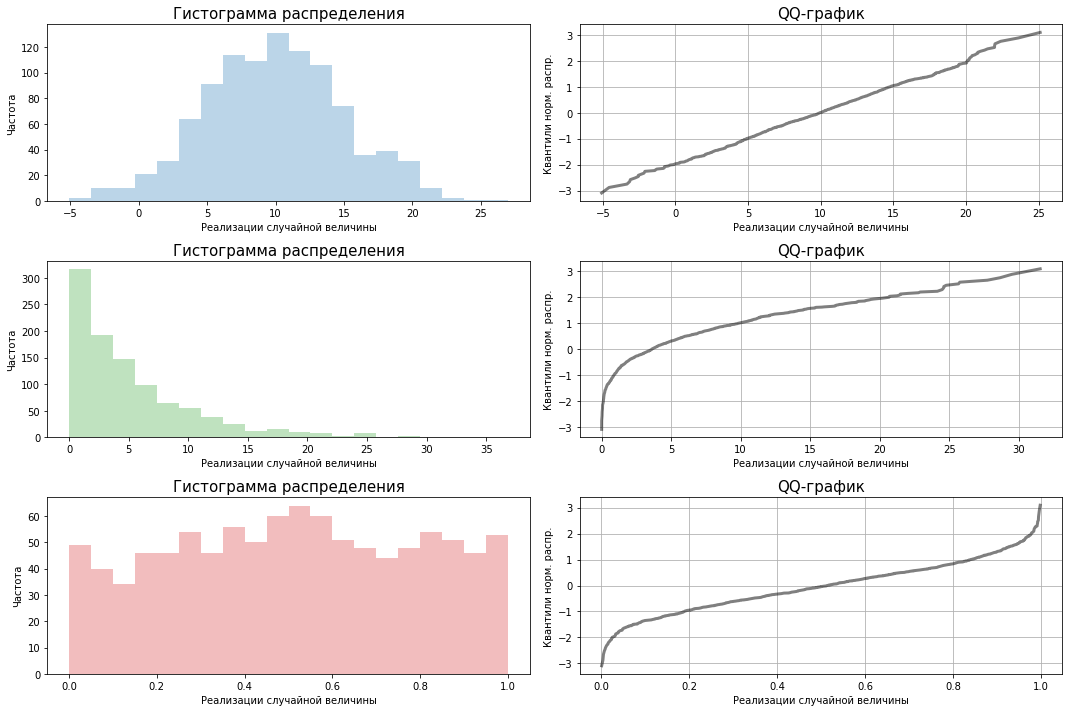

In [164]:
np.random.seed(241)

def plot_data(data, row, color):
    ecdf = ECDF(data)
    ax[row,0].hist(data, 20, color=color, alpha = 0.3)
    ax[row,1].plot(ecdf.x, [st.norm.ppf(i) for i in ecdf.y], color = 'k', lw=3, alpha=0.5)
    
    ax[row, 0].set_xlabel(u'Реализации случайной величины')
    ax[row, 0].set_ylabel(u'Частота')
    ax[row, 0].set_title(u'Гистограмма распределения', fontsize = 15)
    
    ax[row, 1].set_xlabel(u'Реализации случайной величины')
    ax[row, 1].set_ylabel(u'Квантили норм. распр.')
    ax[row, 1].set_title(u'QQ-график', fontsize = 15)
    ax[row, 1].grid('on')

fig, ax = plt.subplots(3, 2, figsize=(15,10))

plot_data(data[0], 0, 'C0'); plot_data(data[1], 1, 'C2'); plot_data(data[2], 2, 'C3')
        
plt.tight_layout()
plt.show()

In [169]:
data = np.array([3.4, 7.0, 3.9, 6.1, 0.9, 4.6, 6.4, 3.2, 1.8, 4.8, 3.8, 5.6, 1.3, 3.3, 3.7, 2.9, 5.2, 3.7, 5.0, 3.9])
n = data.shape[0]
sk = st.skew(data)
k = st.kurtosis(data)

jb = round(n * (sk**2 + 0.25 * k**2) / 6., 3)
jb

# Андерсона
an = st.anderson(data)
an

AndersonResult(statistic=0.23459746106233581, critical_values=array([ 0.506,  0.577,  0.692,  0.807,  0.96 ]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

Однородность колмогоров-смирнов.

Таблица http://smc.edu.nstu.ru/krit_kolm.htm

[пример](https://stepik.org/lesson/26281/step/14?unit=8174)

1.3416407865


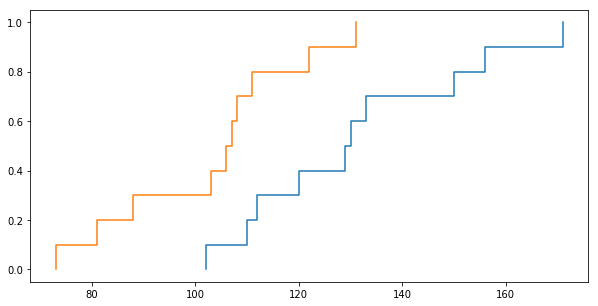

In [191]:
placebo = np.array([156, 171, 133, 102, 129, 150, 120, 110, 112, 130], dtype=float)
nip = np.array([73, 81, 103, 88, 131, 106, 107, 111, 122, 108], dtype = float)

n = placebo.shape[0]
m = nip.shape[0]

ecdf_p = ECDF(placebo)
ecdf_n = ECDF(nip)

ecdf_x = np.sort(list(ecdf_p.x) + list(ecdf_p.x))[1:]
ecdf_y = np.sort(list(ecdf_p.y) + list(ecdf_p.y))[:-1]

ecdf_x1 = np.sort(list(ecdf_n.x) + list(ecdf_n.x))[1:]
ecdf_y1 = np.sort(list(ecdf_n.y) + list(ecdf_n.y))[:-1]

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ecdf_x, ecdf_y)
ax.plot(ecdf_x1, ecdf_y1)

# Смирнова однородность
print(np.sqrt(n * m/(n + m))* st.ks_2samp(placebo, nip)[0])    
plt.show()

In [225]:
b = np.array([200,190,195,190,194,202,202,207,205,220,213,196,203], dtype = float)
v = np.array([205,202,218,213,198,198,195,204,197,202,201,205,201,197,198,197,209], dtype = float)
alpha = 0.05

n = b.shape[0] + v.shape[0]
ni1 = np.array([ np.sum(b <= 200), b.shape[0] - np.sum(b <= 200)], dtype = float)
ni2 = np.array([ np.sum(v <= 200), v.shape[0] - np.sum(v <= 200)], dtype = float)
ni = ni1 + ni2
pi = ni / n

d = np.sum( (ni1 - pi * b.shape[0])**2 / (pi * b.shape[0]) )
d += np.sum( (ni2 - pi * v.shape[0])**2 / (pi * v.shape[0]) )
print(d)
print(st.chi2.ppf(1 - alpha, 1))


c = np.sum(( np.abs(ni1 - pi * b.shape[0]) - 0.5 )**2 / (pi * b.shape[0]))
c += np.sum(( np.abs(ni2 - pi * v.shape[0]) - 0.5 )**2 / (pi * v.shape[0]))
print(c)


0.0743228025634
3.84145882069
0.00982780860343
